#  Pandas库

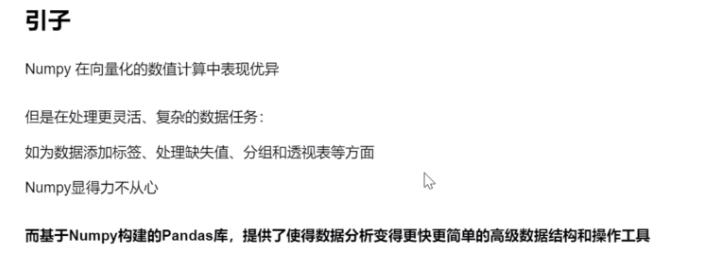

## 对象创建

### 1）Pandas Series对象

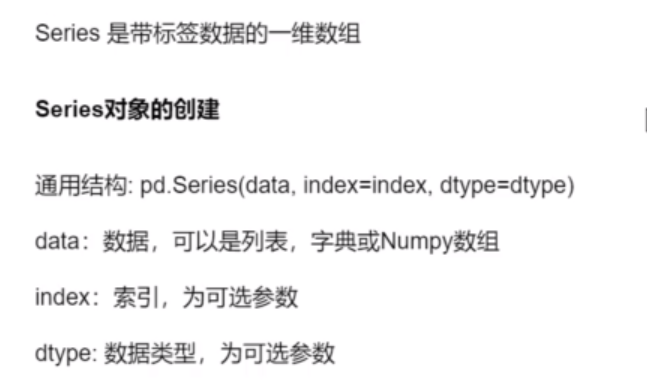

**1、用列表创建**

- index缺省，默认为整数序列

In [2]:
import pandas as pd

data = pd.Series([1.5, 3, 4.5, 6])
data

0    1.5
1    3.0
2    4.5
3    6.0
dtype: float64

- 增加index

In [3]:
data = pd.Series([1.5, 3, 4.5, 6], index=['a', 'b', 'c', 'd'])
data

a    1.5
b    3.0
c    4.5
d    6.0
dtype: float64

- 增加数据类型
        
        缺省则从传入的数据自动判断

In [4]:
data = pd.Series([1, 3, 4, 6], index=['a', 'b', 'c', 'd'])
data

a    1
b    3
c    4
d    6
dtype: int64

In [5]:
data = pd.Series([1, 3, 4, 6], index=['a', 'b', 'c', 'd'], dtype='float')
data

a    1.0
b    3.0
c    4.0
d    6.0
dtype: float64

**注意：数据支持多种类型**

In [6]:
data = pd.Series([1, 3, '4', 6], index=['a', 'b', 'c', 'd'])
data

a    1
b    3
c    4
d    6
dtype: object

In [7]:
data['a']

1

In [8]:
data['c']

'4'

**数据类型可被强制改变**

In [9]:
data = pd.Series([1, 3, '4', 6], index=['a', 'b', 'c', 'd'], dtype=float)
data

a    1.0
b    3.0
c    4.0
d    6.0
dtype: float64

In [11]:
data['c']

4.0

In [12]:
data = pd.Series([1, 3, 'a', 6], index=['a', 'b', 'c', 'd'], dtype=float)
data

ValueError: could not convert string to float: 'a'

**2、用一维numpy数组创建**

In [1]:
import numpy as np
import pandas as pd

x = np.arange(5)
pd.Series(x)

0    0
1    1
2    2
3    3
4    4
dtype: int32

**3、用字典创建**

- 默认以键为index，值为data

In [2]:
population_dict = {'Beijing': 2154,
                  'Shanghai': 2424,
                  'Shenzhen': 1303,
                  'Hangzhou': 981 }
population = pd.Series(population_dict)
population

Beijing     2154
Shanghai    2424
Shenzhen    1303
Hangzhou     981
dtype: int64

- 字典创建，如果指定index，则会到字典的键中筛选，找不到的，值设为NaN

In [3]:
population = pd.Series(population_dict, index=['Beijing', 'Hangzhou', 'c', 'd'])
population

Beijing     2154.0
Hangzhou     981.0
c              NaN
d              NaN
dtype: float64

**4、data为标量的情况**

In [4]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

### 2）Pandas DataFrame对象

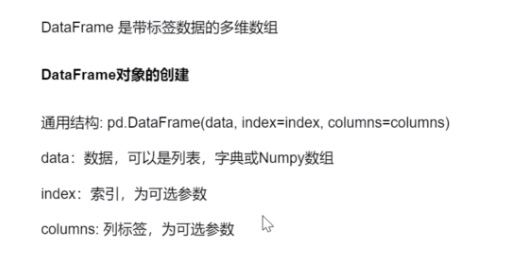

**1、通过Series对象创建**

In [5]:
population_dict = {'Beijing': 2154,
                  'Shanghai': 2424,
                  'Shenzhen': 1303,
                  'Hangzhou': 981 }
population = pd.Series(population_dict)
pd.DataFrame(population)

,0
Beijing,2154
Shanghai,2424
Shenzhen,1303
Hangzhou,981


In [6]:
pd.DataFrame(population, columns=['population'])

,population
Beijing,2154
Shanghai,2424
Shenzhen,1303
Hangzhou,981


**2、通过Series对象字典创建**

In [7]:
GDP_dict = {'Beijing': 30320,
           'Shanghai': 32680,
           'Shenzhen': 24222,
           'Hangzhou': 13468}

GDP = pd.Series(GDP_dict)
GDP

Beijing     30320
Shanghai    32680
Shenzhen    24222
Hangzhou    13468
dtype: int64

**注意：数量不够的会自动补齐**

In [8]:
pd.DataFrame({'population': population,
             'GDP': GDP,
             'country': 'China'})

,population,GDP,country
Beijing,2154,30320,China
Shanghai,2424,32680,China
Shenzhen,1303,24222,China
Hangzhou,981,13468,China


**3、通过字典列表对象创建**

- 字典索引作为index，字典键作为columns

In [9]:
data = [{'a': i, 'b': 2*i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


- 不存在的键，会默认为NaN

In [10]:
data = [{'a': 1, 'b': 1}, {'b': 3, 'c': 4}]
pd.DataFrame(data)

,a,b,c
0,1.0,1,NaN
1,NaN,3,4.0


**4、通过Numpy二维数组创建**

In [11]:
pd.DataFrame(np.random.randint(10, size=(3, 2)), columns=['foo', 'bar'], index=['a', 'b', 'c'])

,foo,bar
a,7,8
b,4,9
c,8,6


## DataFrame性质

**1、属性**

In [12]:
data = pd.DataFrame({'pop': population, 'GDP': GDP})
data

,pop,GDP
Beijing,2154,30320
Shanghai,2424,32680
Shenzhen,1303,24222
Hangzhou,981,13468


（1）df.values 返回 numpy数组表示的数据

In [13]:
data.values

array([[ 2154, 30320],
       [ 2424, 32680],
       [ 1303, 24222],
       [  981, 13468]], dtype=int64)

（2）df.index 返回行索引

In [14]:
data.index

Index(['Beijing', 'Shanghai', 'Shenzhen', 'Hangzhou'], dtype='object')

（3）df.columns 返回列索引

In [15]:
data.columns

Index(['pop', 'GDP'], dtype='object')

（4）df.shape 形状

In [16]:
data.shape

(4, 2)

（5）df.size 大小

In [17]:
data.size

8

（6）df.dtypes 返回每列数据类型

In [18]:
data.dtypes

pop    int64
GDP    int64
dtype: object

**2、索引**

In [19]:
data

,pop,GDP
Beijing,2154,30320
Shanghai,2424,32680
Shenzhen,1303,24222
Hangzhou,981,13468


（1）字典式

In [20]:
data['pop']

Beijing     2154
Shanghai    2424
Shenzhen    1303
Hangzhou     981
Name: pop, dtype: int64

In [21]:
data[['GDP', 'pop']]       # 用列表

,GDP,pop
Beijing,30320,2154
Shanghai,32680,2424
Shenzhen,24222,1303
Hangzhou,13468,981


In [22]:
# 对象属性式
data.GDP

Beijing     30320
Shanghai    32680
Shenzhen    24222
Hangzhou    13468
Name: GDP, dtype: int64

（2）获取行

In [23]:
# 绝对索引 df.loc
data.loc['Beijing']

pop     2154
GDP    30320
Name: Beijing, dtype: int64

In [24]:
data.loc[['Beijing', 'Hangzhou']]

,pop,GDP
Beijing,2154,30320
Hangzhou,981,13468


In [25]:
# 相对索引 df.iloc
data.iloc[0]

pop     2154
GDP    30320
Name: Beijing, dtype: int64

In [26]:
data.iloc[[1, 3]]

,pop,GDP
Shanghai,2424,32680
Hangzhou,981,13468


（3）获取标量

In [27]:
data

,pop,GDP
Beijing,2154,30320
Shanghai,2424,32680
Shenzhen,1303,24222
Hangzhou,981,13468


In [28]:
data.loc['Beijing', 'GDP']

30320

In [29]:
data.iloc[0, 1]

30320

In [30]:
data.values[0][1]

30320

（4）Series对象的索引

In [31]:
type(data.GDP)

pandas.core.series.Series

In [32]:
GDP

Beijing     30320
Shanghai    32680
Shenzhen    24222
Hangzhou    13468
dtype: int64

In [33]:
GDP['Beijing']

30320

**3、切片**

In [34]:
dates = pd.date_range(start='2019-01-01', periods=6)
dates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')

In [35]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2019-01-01,1.283784,0.108308,0.938257,-1.196722
2019-01-02,1.623515,-0.751787,-0.038676,-1.332105
2019-01-03,-0.668998,-0.700558,-0.848425,1.870254
2019-01-04,1.642875,1.095047,1.192884,-0.692643
2019-01-05,0.064432,0.180733,-0.019166,-0.601074
2019-01-06,-2.081043,-1.019506,-1.030003,-0.534191


（1）行切片

In [36]:
df['2019-01-01': '2019-01-03']

,A,B,C,D
2019-01-01,1.283784,0.108308,0.938257,-1.196722
2019-01-02,1.623515,-0.751787,-0.038676,-1.332105
2019-01-03,-0.668998,-0.700558,-0.848425,1.870254


In [37]:
df.loc['2019-01-01': '2019-01-03']

,A,B,C,D
2019-01-01,1.283784,0.108308,0.938257,-1.196722
2019-01-02,1.623515,-0.751787,-0.038676,-1.332105
2019-01-03,-0.668998,-0.700558,-0.848425,1.870254


In [38]:
df.iloc[0: 3]

,A,B,C,D
2019-01-01,1.283784,0.108308,0.938257,-1.196722
2019-01-02,1.623515,-0.751787,-0.038676,-1.332105
2019-01-03,-0.668998,-0.700558,-0.848425,1.870254


（2）列切片

In [39]:
df

,A,B,C,D
2019-01-01,1.283784,0.108308,0.938257,-1.196722
2019-01-02,1.623515,-0.751787,-0.038676,-1.332105
2019-01-03,-0.668998,-0.700558,-0.848425,1.870254
2019-01-04,1.642875,1.095047,1.192884,-0.692643
2019-01-05,0.064432,0.180733,-0.019166,-0.601074
2019-01-06,-2.081043,-1.019506,-1.030003,-0.534191


In [40]:
df.loc[:, 'A': 'C']

,A,B,C
2019-01-01,1.283784,0.108308,0.938257
2019-01-02,1.623515,-0.751787,-0.038676
2019-01-03,-0.668998,-0.700558,-0.848425
2019-01-04,1.642875,1.095047,1.192884
2019-01-05,0.064432,0.180733,-0.019166
2019-01-06,-2.081043,-1.019506,-1.030003


In [41]:
df.iloc[:, 0:3]

,A,B,C
2019-01-01,1.283784,0.108308,0.938257
2019-01-02,1.623515,-0.751787,-0.038676
2019-01-03,-0.668998,-0.700558,-0.848425
2019-01-04,1.642875,1.095047,1.192884
2019-01-05,0.064432,0.180733,-0.019166
2019-01-06,-2.081043,-1.019506,-1.030003


（3）多种多样的取值

In [42]:
# 行列同时切片
df.loc['2019-01-01': '2019-01-03', 'C':'D']

,C,D
2019-01-01,0.938257,-1.196722
2019-01-02,-0.038676,-1.332105
2019-01-03,-0.848425,1.870254


In [43]:
df.iloc[0: 3, 2:]

,C,D
2019-01-01,0.938257,-1.196722
2019-01-02,-0.038676,-1.332105
2019-01-03,-0.848425,1.870254


In [44]:
# 行切片、列分散取值
df.loc['2019-01-01': '2019-01-03', ['A', 'C']]

,A,C
2019-01-01,1.283784,0.938257
2019-01-02,1.623515,-0.038676
2019-01-03,-0.668998,-0.848425


In [45]:
df.iloc[3:, [0, 2]]

,A,C
2019-01-04,1.642875,1.192884
2019-01-05,0.064432,-0.019166
2019-01-06,-2.081043,-1.030003


In [46]:
# 行分散取值，列切片
df.loc[['2019-01-01', '2019-01-03'], 'C':'D']    # 行不通

KeyError: "None of [Index(['2019-01-01', '2019-01-03'], dtype='object')] are in the [index]"

In [109]:
df.iloc[[0, 2], 2:]

,C,D
2019-01-01,0.784912,NaN
2019-01-03,0.942704,-0.387654


In [110]:
# 行列均分散取值
df.loc[['2019-01-01', '2019-01-03'], ['A', 'D']]        # 行不通

KeyError: "None of [Index(['2019-01-01', '2019-01-03'], dtype='object')] are in the [index]"

In [111]:
df.iloc[[1, 5], [0, 3]]

,A,D
2019-01-02,-0.167505,0.752896
2019-01-06,-0.376812,-1.189443


**4、布尔索引**

In [112]:
df

,A,B,C,D
2019-01-01,-2.607364,-1.137236,0.784912,NaN
2019-01-02,-0.167505,-0.491806,-0.276521,0.752896
2019-01-03,0.025026,-1.375990,0.942704,-0.387654
2019-01-04,0.955800,-0.347325,-0.230517,1.006863
2019-01-05,0.113798,0.189463,-0.824161,-0.429858
2019-01-06,-0.376812,-0.844323,-0.163307,-1.189443


In [47]:
df > 0

,A,B,C,D
2019-01-01,True,True,True,False
2019-01-02,True,False,False,False
2019-01-03,False,False,False,True
2019-01-04,True,True,True,False
2019-01-05,True,True,False,False
2019-01-06,False,False,False,False


In [48]:
df[df > 0]

,A,B,C,D
2019-01-01,1.283784,0.108308,0.938257,NaN
2019-01-02,1.623515,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,1.870254
2019-01-04,1.642875,1.095047,1.192884,NaN
2019-01-05,0.064432,0.180733,NaN,NaN
2019-01-06,NaN,NaN,NaN,NaN


In [49]:
df.A > 0

2019-01-01     True
2019-01-02     True
2019-01-03    False
2019-01-04     True
2019-01-05     True
2019-01-06    False
Freq: D, Name: A, dtype: bool

In [50]:
df[df.A > 0]               # 根据某一列的条件，取出对应行

,A,B,C,D
2019-01-01,1.283784,0.108308,0.938257,-1.196722
2019-01-02,1.623515,-0.751787,-0.038676,-1.332105
2019-01-04,1.642875,1.095047,1.192884,-0.692643
2019-01-05,0.064432,0.180733,-0.019166,-0.601074


In [51]:
# isin() 方法
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2019-01-01,1.283784,0.108308,0.938257,-1.196722,one
2019-01-02,1.623515,-0.751787,-0.038676,-1.332105,one
2019-01-03,-0.668998,-0.700558,-0.848425,1.870254,two
2019-01-04,1.642875,1.095047,1.192884,-0.692643,three
2019-01-05,0.064432,0.180733,-0.019166,-0.601074,four
2019-01-06,-2.081043,-1.019506,-1.030003,-0.534191,three


In [52]:
ind = df2['E'].isin(['two', 'four'])
ind

2019-01-01    False
2019-01-02    False
2019-01-03     True
2019-01-04    False
2019-01-05     True
2019-01-06    False
Freq: D, Name: E, dtype: bool

In [53]:
df2[ind]

,A,B,C,D,E
2019-01-03,-0.668998,-0.700558,-0.848425,1.870254,two
2019-01-05,0.064432,0.180733,-0.019166,-0.601074,four


（5）赋值

In [54]:
df

,A,B,C,D
2019-01-01,1.283784,0.108308,0.938257,-1.196722
2019-01-02,1.623515,-0.751787,-0.038676,-1.332105
2019-01-03,-0.668998,-0.700558,-0.848425,1.870254
2019-01-04,1.642875,1.095047,1.192884,-0.692643
2019-01-05,0.064432,0.180733,-0.019166,-0.601074
2019-01-06,-2.081043,-1.019506,-1.030003,-0.534191


In [55]:
# DataFrame增加新列
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20190101', periods=6))
s1

2019-01-01    1
2019-01-02    2
2019-01-03    3
2019-01-04    4
2019-01-05    5
2019-01-06    6
Freq: D, dtype: int64

In [56]:
df['E'] = s1
df

,A,B,C,D,E
2019-01-01,1.283784,0.108308,0.938257,-1.196722,1
2019-01-02,1.623515,-0.751787,-0.038676,-1.332105,2
2019-01-03,-0.668998,-0.700558,-0.848425,1.870254,3
2019-01-04,1.642875,1.095047,1.192884,-0.692643,4
2019-01-05,0.064432,0.180733,-0.019166,-0.601074,5
2019-01-06,-2.081043,-1.019506,-1.030003,-0.534191,6


In [57]:
# 修改赋值
df.loc['2019-01-01', 'A'] = 0
df

,A,B,C,D,E
2019-01-01,0.000000,0.108308,0.938257,-1.196722,1
2019-01-02,1.623515,-0.751787,-0.038676,-1.332105,2
2019-01-03,-0.668998,-0.700558,-0.848425,1.870254,3
2019-01-04,1.642875,1.095047,1.192884,-0.692643,4
2019-01-05,0.064432,0.180733,-0.019166,-0.601074,5
2019-01-06,-2.081043,-1.019506,-1.030003,-0.534191,6


In [58]:
df2   # 没变，说明是副本，不是视图

,A,B,C,D,E
2019-01-01,1.283784,0.108308,0.938257,-1.196722,one
2019-01-02,1.623515,-0.751787,-0.038676,-1.332105,one
2019-01-03,-0.668998,-0.700558,-0.848425,1.870254,two
2019-01-04,1.642875,1.095047,1.192884,-0.692643,three
2019-01-05,0.064432,0.180733,-0.019166,-0.601074,four
2019-01-06,-2.081043,-1.019506,-1.030003,-0.534191,three


In [59]:
df.iloc[0, 1] = 0
df

,A,B,C,D,E
2019-01-01,0.000000,0.000000,0.938257,-1.196722,1
2019-01-02,1.623515,-0.751787,-0.038676,-1.332105,2
2019-01-03,-0.668998,-0.700558,-0.848425,1.870254,3
2019-01-04,1.642875,1.095047,1.192884,-0.692643,4
2019-01-05,0.064432,0.180733,-0.019166,-0.601074,5
2019-01-06,-2.081043,-1.019506,-1.030003,-0.534191,6


In [60]:
df['D'] = np.array([5]*len(df))       # 可简化成df['D'] = 5
df

,A,B,C,D,E
2019-01-01,0.000000,0.000000,0.938257,5,1
2019-01-02,1.623515,-0.751787,-0.038676,5,2
2019-01-03,-0.668998,-0.700558,-0.848425,5,3
2019-01-04,1.642875,1.095047,1.192884,5,4
2019-01-05,0.064432,0.180733,-0.019166,5,5
2019-01-06,-2.081043,-1.019506,-1.030003,5,6


In [61]:
# 修改 index 和 columns
df.index = [i for i in range(len(df))]
df

,A,B,C,D,E
0,0.000000,0.000000,0.938257,5,1
1,1.623515,-0.751787,-0.038676,5,2
2,-0.668998,-0.700558,-0.848425,5,3
3,1.642875,1.095047,1.192884,5,4
4,0.064432,0.180733,-0.019166,5,5
5,-2.081043,-1.019506,-1.030003,5,6


In [62]:
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4
0,0.000000,0.000000,0.938257,5,1
1,1.623515,-0.751787,-0.038676,5,2
2,-0.668998,-0.700558,-0.848425,5,3
3,1.642875,1.095047,1.192884,5,4
4,0.064432,0.180733,-0.019166,5,5
5,-2.081043,-1.019506,-1.030003,5,6


## 3）数值运算及统计分析

**1、数据的查看**

In [63]:
dates = pd.date_range(start='2019-01-01', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2019-01-01,-2.607364,-1.137236,0.784912,0.470032
2019-01-02,-0.167505,-0.491806,-0.276521,0.752896
2019-01-03,0.025026,-1.375990,0.942704,-0.387654
2019-01-04,0.955800,-0.347325,-0.230517,1.006863
2019-01-05,0.113798,0.189463,-0.824161,-0.429858
2019-01-06,-0.376812,-0.844323,-0.163307,-1.189443


（1）查看前面的行

In [64]:
df.head()      # 默认5行

,A,B,C,D
2019-01-01,-2.607364,-1.137236,0.784912,0.470032
2019-01-02,-0.167505,-0.491806,-0.276521,0.752896
2019-01-03,0.025026,-1.375990,0.942704,-0.387654
2019-01-04,0.955800,-0.347325,-0.230517,1.006863
2019-01-05,0.113798,0.189463,-0.824161,-0.429858


In [65]:
df.head(2)

,A,B,C,D
2019-01-01,-2.607364,-1.137236,0.784912,0.470032
2019-01-02,-0.167505,-0.491806,-0.276521,0.752896


（2）查看后面的行

In [66]:
df.tail()        # 默认5行

,A,B,C,D
2019-01-02,-0.167505,-0.491806,-0.276521,0.752896
2019-01-03,0.025026,-1.375990,0.942704,-0.387654
2019-01-04,0.955800,-0.347325,-0.230517,1.006863
2019-01-05,0.113798,0.189463,-0.824161,-0.429858
2019-01-06,-0.376812,-0.844323,-0.163307,-1.189443


In [67]:
df.tail(3)

,A,B,C,D
2019-01-04,0.955800,-0.347325,-0.230517,1.006863
2019-01-05,0.113798,0.189463,-0.824161,-0.429858
2019-01-06,-0.376812,-0.844323,-0.163307,-1.189443


（3）查看总体信息

In [68]:
df.iloc[0, 3] = np.nan       # 将(0，3)设为 NaN
df

,A,B,C,D
2019-01-01,-2.607364,-1.137236,0.784912,NaN
2019-01-02,-0.167505,-0.491806,-0.276521,0.752896
2019-01-03,0.025026,-1.375990,0.942704,-0.387654
2019-01-04,0.955800,-0.347325,-0.230517,1.006863
2019-01-05,0.113798,0.189463,-0.824161,-0.429858
2019-01-06,-0.376812,-0.844323,-0.163307,-1.189443


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2019-01-01 to 2019-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       5 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


**2、Numpy通用函数同样适用于Pandas**

（1）向量化运算

In [70]:
x = pd.DataFrame(np.arange(4))
x

,0
0,0
1,1
2,2
3,3


In [71]:
x = pd.DataFrame(np.arange(4).reshape(1, 4))
x

,0,1,2,3
0,0,1,2,3


In [72]:
x + 5

,0,1,2,3
0,5,6,7,8


In [73]:
np.exp(x)

,0,1,2,3
0,1.0,2.718282,7.389056,20.085537


In [74]:
y = pd.DataFrame(np.arange(4, 8).reshape(1, 4))
y

,0,1,2,3
0,4,5,6,7


In [75]:
x*y

,0,1,2,3
0,0,5,12,21


（2）矩阵化运算

In [76]:
np.random.seed(42)
x = pd.DataFrame(np.random.randint(10, size=(30, 30)))
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,6,3,7,4,6,9,2,6,7,4,...,4,0,9,5,8,0,9,2,6,3
1,8,2,4,2,6,4,8,6,1,3,...,2,0,3,1,7,3,1,5,5,9
2,3,5,1,9,1,9,3,7,6,8,...,6,8,7,0,7,7,2,0,7,2
3,2,0,4,9,6,9,8,6,8,7,...,0,2,4,2,0,4,9,6,6,8
4,9,9,2,6,0,3,3,4,6,6,...,9,6,8,6,0,0,8,8,3,8
5,2,6,5,7,8,4,0,2,9,7,...,2,0,4,0,7,0,0,1,1,5
6,6,4,0,0,2,1,4,9,5,6,...,5,0,8,5,2,3,3,2,9,2
7,2,3,6,3,8,0,7,6,1,7,...,3,0,1,0,4,4,6,8,8,2
8,2,2,3,7,5,7,0,7,3,0,...,1,1,5,2,8,3,0,3,0,4
9,3,7,7,6,2,0,0,2,5,6,...,4,2,3,2,0,0,4,5,2,8


In [77]:
# 转置
z = x.T
z

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,6,8,3,2,9,2,6,2,2,3,...,4,2,4,0,9,4,6,2,6,3
1,3,2,5,0,9,6,4,3,2,7,...,5,4,5,5,7,1,7,8,8,0
2,7,4,1,4,2,5,0,6,3,7,...,5,8,2,4,0,9,1,1,6,3
3,4,2,9,9,6,7,0,3,7,6,...,2,1,4,8,9,5,9,3,2,0
4,6,6,1,6,0,8,2,8,5,2,...,6,9,6,0,0,4,7,5,2,0
5,9,4,9,9,3,4,1,0,7,0,...,8,7,4,6,3,5,2,1,7,9
6,2,8,3,8,3,0,4,7,0,0,...,9,1,4,4,7,0,6,7,4,5
7,6,6,7,6,4,2,9,6,7,2,...,7,4,4,4,4,4,2,7,3,4
8,7,1,6,8,6,9,5,1,3,5,...,5,6,9,1,1,8,6,0,7,3
9,4,3,8,7,6,7,6,7,0,6,...,7,7,9,2,5,9,1,2,5,2


In [78]:
np.random.seed(1)
y = pd.DataFrame(np.random.randint(10, size=(30, 30)))
y

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,5,8,9,5,0,0,1,7,6,9,...,1,7,0,6,9,9,7,6,9,1
1,0,1,8,8,3,9,8,7,3,6,...,9,2,0,4,9,2,7,7,9,8
2,6,9,3,7,7,4,5,9,3,6,...,7,7,1,1,3,0,8,6,4,5
3,6,2,5,7,8,4,4,7,7,4,...,0,1,9,8,2,3,1,2,7,2
4,6,0,9,2,6,6,2,7,7,0,...,1,5,4,0,7,8,9,5,7,0
5,9,3,9,1,4,4,6,8,8,9,...,1,8,7,0,3,4,2,0,3,5
6,1,2,4,3,0,6,0,7,2,8,...,4,3,3,6,7,3,5,3,2,4
7,4,0,3,3,8,3,5,6,7,5,...,1,7,3,1,6,6,9,6,9,6
8,0,0,2,9,6,0,6,7,0,3,...,6,7,9,5,4,9,5,2,5,6
9,6,8,7,7,7,2,6,0,5,2,...,7,0,6,2,4,3,6,7,6,3


In [79]:
x.dot(y)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,616,560,723,739,612,457,681,799,575,590,...,523,739,613,580,668,602,733,585,657,700
1,520,438,691,600,612,455,666,764,707,592,...,555,681,503,679,641,506,779,494,633,590
2,557,570,786,807,690,469,804,828,704,573,...,563,675,712,758,793,672,754,550,756,638
3,605,507,664,701,660,496,698,806,651,575,...,582,685,668,586,629,534,678,484,591,626
4,599,681,753,873,721,563,754,770,620,654,...,633,747,661,677,726,649,716,610,735,706
5,422,354,602,627,613,396,617,627,489,423,...,456,572,559,537,499,384,589,436,574,507
6,359,446,599,599,481,357,577,572,451,464,...,449,550,495,532,633,554,663,476,565,602
7,531,520,698,590,607,537,665,696,571,472,...,576,588,551,665,652,527,742,528,650,599
8,449,322,547,533,593,399,584,638,587,424,...,402,596,523,523,447,362,561,386,529,484
9,373,433,525,601,522,345,551,521,434,447,...,508,498,438,478,459,418,488,407,503,496


In [80]:
%timeit x.dot(y)

221 µs ± 14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [81]:
%timeit np.dot(x, y)

69.8 µs ± 2.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [82]:
# 执行相同运算，Numpy 与 Pandas 的对比
x1 = np.array(x)
x1

array([[6, 3, 7, 4, 6, 9, 2, 6, 7, 4, 3, 7, 7, 2, 5, 4, 1, 7, 5, 1, 4, 0,
        9, 5, 8, 0, 9, 2, 6, 3],
       [8, 2, 4, 2, 6, 4, 8, 6, 1, 3, 8, 1, 9, 8, 9, 4, 1, 3, 6, 7, 2, 0,
        3, 1, 7, 3, 1, 5, 5, 9],
       [3, 5, 1, 9, 1, 9, 3, 7, 6, 8, 7, 4, 1, 4, 7, 9, 8, 8, 0, 8, 6, 8,
        7, 0, 7, 7, 2, 0, 7, 2],
       [2, 0, 4, 9, 6, 9, 8, 6, 8, 7, 1, 0, 6, 6, 7, 4, 2, 7, 5, 2, 0, 2,
        4, 2, 0, 4, 9, 6, 6, 8],
       [9, 9, 2, 6, 0, 3, 3, 4, 6, 6, 3, 6, 2, 5, 1, 9, 8, 4, 5, 3, 9, 6,
        8, 6, 0, 0, 8, 8, 3, 8],
       [2, 6, 5, 7, 8, 4, 0, 2, 9, 7, 5, 7, 8, 3, 0, 0, 9, 3, 6, 1, 2, 0,
        4, 0, 7, 0, 0, 1, 1, 5],
       [6, 4, 0, 0, 2, 1, 4, 9, 5, 6, 3, 6, 7, 0, 5, 7, 4, 3, 1, 5, 5, 0,
        8, 5, 2, 3, 3, 2, 9, 2],
       [2, 3, 6, 3, 8, 0, 7, 6, 1, 7, 0, 8, 8, 1, 6, 9, 2, 6, 9, 8, 3, 0,
        1, 0, 4, 4, 6, 8, 8, 2],
       [2, 2, 3, 7, 5, 7, 0, 7, 3, 0, 7, 3, 5, 7, 3, 2, 8, 2, 8, 1, 1, 1,
        5, 2, 8, 3, 0, 3, 0, 4],
       [3, 7, 7, 6, 2, 0, 0, 2, 5, 6,

In [83]:
y1 = np.array(y)
y1

array([[5, 8, 9, 5, 0, 0, 1, 7, 6, 9, 2, 4, 5, 2, 4, 2, 4, 7, 7, 9, 1, 7,
        0, 6, 9, 9, 7, 6, 9, 1],
       [0, 1, 8, 8, 3, 9, 8, 7, 3, 6, 5, 1, 9, 3, 4, 8, 1, 4, 0, 3, 9, 2,
        0, 4, 9, 2, 7, 7, 9, 8],
       [6, 9, 3, 7, 7, 4, 5, 9, 3, 6, 8, 0, 2, 7, 7, 9, 7, 3, 0, 8, 7, 7,
        1, 1, 3, 0, 8, 6, 4, 5],
       [6, 2, 5, 7, 8, 4, 4, 7, 7, 4, 9, 0, 2, 0, 7, 1, 7, 9, 8, 4, 0, 1,
        9, 8, 2, 3, 1, 2, 7, 2],
       [6, 0, 9, 2, 6, 6, 2, 7, 7, 0, 6, 5, 1, 4, 6, 0, 6, 5, 1, 2, 1, 5,
        4, 0, 7, 8, 9, 5, 7, 0],
       [9, 3, 9, 1, 4, 4, 6, 8, 8, 9, 2, 7, 5, 5, 4, 5, 8, 5, 8, 1, 1, 8,
        7, 0, 3, 4, 2, 0, 3, 5],
       [1, 2, 4, 3, 0, 6, 0, 7, 2, 8, 3, 0, 8, 4, 2, 9, 0, 3, 8, 1, 4, 3,
        3, 6, 7, 3, 5, 3, 2, 4],
       [4, 0, 3, 3, 8, 3, 5, 6, 7, 5, 1, 7, 0, 2, 8, 2, 1, 4, 0, 4, 1, 7,
        3, 1, 6, 6, 9, 6, 9, 6],
       [0, 0, 2, 9, 6, 0, 6, 7, 0, 3, 9, 0, 3, 4, 7, 5, 3, 8, 8, 0, 6, 7,
        9, 5, 4, 9, 5, 2, 5, 6],
       [6, 8, 7, 7, 7, 2, 6, 0, 5, 2,

In [84]:
%timeit x1.dot(y1)

19.9 µs ± 622 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [85]:
%timeit np.dot(x1, y1)

20.4 µs ± 454 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [86]:
%timeit np.dot(x.values, y.values)

36 µs ± 209 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**一般来讲，纯粹的计算在Numpy中执行的更快**

Numpy更侧重于计算，Pandas更侧重于数据处理

（3）广播运算

In [87]:
np.random.seed(42)
x = pd.DataFrame(np.random.randint(10, size=(3, 3)), columns=list('ABC'))
x

,A,B,C
0,6,3,7
1,4,6,9
2,2,6,7


In [88]:
# 按行广播
x.iloc[0]

A    6
B    3
C    7
Name: 0, dtype: int32

In [89]:
x/x.iloc[0]           # 每行都除以 第0行

,A,B,C
0,1.000000,1.0,1.000000
1,0.666667,2.0,1.285714
2,0.333333,2.0,1.000000


In [90]:
# 按列广播
x.A

0    6
1    4
2    2
Name: A, dtype: int32

In [91]:
x.div(x.A, axis=0)             # add sub div mul

,A,B,C
0,1.0,0.5,1.166667
1,1.0,1.5,2.250000
2,1.0,3.0,3.500000


In [92]:
x.div(x.iloc[0], axis=1)

,A,B,C
0,1.000000,1.0,1.000000
1,0.666667,2.0,1.285714
2,0.333333,2.0,1.000000


**3、新的用法**

（1）索引对齐

In [93]:
A = pd.DataFrame(np.random.randint(0, 20, size=(2,2)), columns=list('AB'))
A

,A,B
0,3,7
1,2,1


In [94]:
B = pd.DataFrame(np.random.randint(0, 10, size=(3, 3)), columns=list('ABC'))
B

,A,B,C
0,7,5,1
1,4,0,9
2,5,8,0


In [95]:
# pandas 会自动对齐两个对象的索引，没有的值用 np.nan 表示
A + B

,A,B,C
0,10.0,12.0,NaN
1,6.0,1.0,NaN
2,NaN,NaN,NaN


In [96]:
# 缺省值也可用 fill_value 来填充
A.add(B, fill_value=0)

,A,B,C
0,10.0,12.0,1.0
1,6.0,1.0,9.0
2,5.0,8.0,0.0


（2）统计相关

In [97]:
# 数据种类统计
y = np.random.randint(3, size=20)
y

array([2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 1])

In [98]:
np.unique(y)

array([0, 1, 2])

In [99]:
from collections import Counter
Counter(y)

Counter({2: 11, 1: 5, 0: 4})

In [100]:
y1 = pd.DataFrame(y, columns=['A'])
y1

,A
0,2
1,2
2,2
3,1
4,2
5,1
6,1
7,2
8,1
9,2


In [101]:
np.unique(y1)

array([0, 1, 2])

In [102]:
y1['A'].value_counts()

2    11
1     5
0     4
Name: A, dtype: int64

In [103]:
# 产生新的结果，并进行排序
city_info = pd.DataFrame({'population': population, 'GDP': GDP})
city_info

,population,GDP
Beijing,2154,30320
Shanghai,2424,32680
Shenzhen,1303,24222
Hangzhou,981,13468


In [104]:
city_info['per_GDP'] = city_info['GDP']/city_info['population']
city_info

,population,GDP,per_GDP
Beijing,2154,30320,14.076137
Shanghai,2424,32680,13.481848
Shenzhen,1303,24222,18.589409
Hangzhou,981,13468,13.728848


In [105]:
# 递增排序
city_info.sort_values(by='per_GDP')

,population,GDP,per_GDP
Shanghai,2424,32680,13.481848
Hangzhou,981,13468,13.728848
Beijing,2154,30320,14.076137
Shenzhen,1303,24222,18.589409


In [106]:
# 递减排序
city_info.sort_values(by='per_GDP', ascending=False)

,population,GDP,per_GDP
Shenzhen,1303,24222,18.589409
Beijing,2154,30320,14.076137
Hangzhou,981,13468,13.728848
Shanghai,2424,32680,13.481848


In [107]:
# 按轴进行排序
data = pd.DataFrame(np.random.randint(20, size=(3, 4)), index=[2, 1, 0], columns=list('CBAD'))
data

,C,B,A,D
2,3,13,17,8
1,1,19,14,6
0,11,7,14,2


In [114]:
# 行排序
data.sort_index()

,C,B,A,D
0,11,7,14,2
1,1,19,14,6
2,3,13,17,8


In [115]:
# 列排序
data.sort_index(axis=1)

,A,B,C,D
2,17,13,3,8
1,14,19,1,6
0,14,7,11,2


In [116]:
data.sort_index(axis=1, ascending=False)

,D,C,B,A
2,8,3,13,17
1,6,1,19,14
0,2,11,7,14


In [117]:
# 统计方法
df = pd.DataFrame(np.random.normal(2, 4, size=(6, 4)), columns=list('ABCD'))
df

,A,B,C,D
0,1.082198,3.557396,-3.060476,6.367969
1,13.113252,6.774559,2.874553,5.527044
2,-2.036341,-4.333177,5.094802,-0.152567
3,-3.386712,-1.522365,-2.522209,2.537716
4,4.328491,5.550994,5.577329,5.019991
5,1.171336,-0.493910,-4.032613,6.398588


In [118]:
# 非空个数
df.count()

A    6
B    6
C    6
D    6
dtype: int64

In [119]:
# 求和（默认对列）
df.sum()    

A    14.272224
B     9.533497
C     3.931385
D    25.698741
dtype: float64

In [120]:
# 对行求和
df.sum(axis=1)

0     7.947086
1    28.289408
2    -1.427283
3    -4.893571
4    20.476806
5     3.043402
dtype: float64

In [121]:
# 最大值 最小值
df.min()

A   -3.386712
B   -4.333177
C   -4.032613
D   -0.152567
dtype: float64

In [122]:
df.max(axis=1)

0     6.367969
1    13.113252
2     5.094802
3     2.537716
4     5.577329
5     6.398588
dtype: float64

In [123]:
# 最大值坐标
df.idxmax()

A    1
B    1
C    4
D    5
dtype: int64

In [124]:
# 均值
df.mean()

A    2.378704
B    1.588916
C    0.655231
D    4.283124
dtype: float64

In [125]:
# 方差
df.var()

A    34.980702
B    19.110656
C    18.948144
D     6.726776
dtype: float64

In [126]:
# 标准差
df.std()

A    5.914449
B    4.371574
C    4.352947
D    2.593603
dtype: float64

In [127]:
# 中位数
df.median()

A    1.126767
B    1.531743
C    0.176172
D    5.273518
dtype: float64

In [128]:
# 众数
df.mode()    # 这个表一样多，所以看不出来

,A,B,C,D
0,-3.386712,-4.333177,-4.032613,-0.152567
1,-2.036341,-1.522365,-3.060476,2.537716
2,1.082198,-0.493910,-2.522209,5.019991
3,1.171336,3.557396,2.874553,5.527044
4,4.328491,5.550994,5.094802,6.367969
5,13.113252,6.774559,5.577329,6.398588


In [129]:
# 75% 分位数（该概率分布函数上，n 分位数就是在样本从小到大排序后，第 n% 的数字）
df.quantile(0.75)

A    3.539202
B    5.052594
C    4.539740
D    6.157738
Name: 0.75, dtype: float64

In [130]:
# 一网打尽（全描述）
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,2.378704,1.588916,0.655231,4.283124
std,5.914449,4.371574,4.352947,2.593603
min,-3.386712,-4.333177,-4.032613,-0.152567
25%,-1.256706,-1.265251,-2.925910,3.158284
50%,1.126767,1.531743,0.176172,5.273518
75%,3.539202,5.052594,4.539740,6.157738
max,13.113252,6.774559,5.577329,6.398588


In [131]:
data_2 = pd.DataFrame([['a', 'a', 'c', 'd'],
                      ['c', 'a', 'c', 'b'],
                      ['a', 'a', 'd', 'c']], columns=list('ABCD'))
data_2

,A,B,C,D
0,a,a,c,d
1,c,a,c,b
2,a,a,d,c


In [132]:
data_2.describe()

# count 非空元素数
# unique 非重元素数
# top-freq 最高频元素 及其 出现次数

,A,B,C,D
count,3,3,3,3
unique,2,1,2,3
top,a,a,c,c
freq,2,3,2,1


In [133]:
# 相关性系数 和 协方差
df.corr()          # 对自己的相关性自然是 1，而互相的相关性自然也相等，故为对称矩阵

,A,B,C,D
A,1.000000,0.831063,0.331060,0.510821
B,0.831063,1.000000,0.179244,0.719112
C,0.331060,0.179244,1.000000,-0.450365
D,0.510821,0.719112,-0.450365,1.000000


In [134]:
df.corrwith(df['A'])         # 求某列

A    1.000000
B    0.831063
C    0.331060
D    0.510821
dtype: float64

In [135]:
# 自定义输出
# apply(method) 的用法：使用 method方法 默认对每一列进行相应的操作

df

,A,B,C,D
0,1.082198,3.557396,-3.060476,6.367969
1,13.113252,6.774559,2.874553,5.527044
2,-2.036341,-4.333177,5.094802,-0.152567
3,-3.386712,-1.522365,-2.522209,2.537716
4,4.328491,5.550994,5.577329,5.019991
5,1.171336,-0.493910,-4.032613,6.398588


In [136]:
df.apply(np.cumsum)        # 累加

,A,B,C,D
0,1.082198,3.557396,-3.060476,6.367969
1,14.195450,10.331955,-0.185923,11.895013
2,12.159109,5.998778,4.908878,11.742447
3,8.772397,4.476413,2.386669,14.280162
4,13.100888,10.027406,7.963999,19.300153
5,14.272224,9.533497,3.931385,25.698741


In [137]:
df.apply(np.cumsum, axis=1)

,A,B,C,D
0,1.082198,4.639594,1.579117,7.947086
1,13.113252,19.887811,22.762364,28.289408
2,-2.036341,-6.369518,-1.274717,-1.427283
3,-3.386712,-4.909077,-7.431287,-4.893571
4,4.328491,9.879485,15.456814,20.476806
5,1.171336,0.677427,-3.355186,3.043402


In [138]:
df.apply(sum)

A    14.272224
B     9.533497
C     3.931385
D    25.698741
dtype: float64

In [139]:
df.sum()

A    14.272224
B     9.533497
C     3.931385
D    25.698741
dtype: float64

In [140]:
df.apply(lambda x: x.max()-x.min())

A    16.499965
B    11.107736
C     9.609942
D     6.551155
dtype: float64

In [141]:
def my_describe(x):            # 注意这个 x 代表的是每一列
    return pd.Series([x.count(), x.mean(), x.max(), x.idxmin(), x.std()], 
                    index=['Count', 'mean', 'max', 'idxmin', 'std'])
df.apply(my_describe)

,A,B,C,D
Count,6.000000,6.000000,6.000000,6.000000
mean,2.378704,1.588916,0.655231,4.283124
max,13.113252,6.774559,5.577329,6.398588
idxmin,3.000000,2.000000,5.000000,2.000000
std,5.914449,4.371574,4.352947,2.593603


## 4）缺失值处理

**1、发现缺失值**

In [142]:
import pandas as pd
import numpy as np

data = pd.DataFrame(np.array([[1, np.nan, 2],
                              [np.nan, 3, 4],
                              [5, 6, None]]), columns=['A', 'B', 'C'])
data

,A,B,C
0,1,NaN,2
1,NaN,3,4
2,5,6,None


**注意：有 None、字符串等，数据类型全部变为 object，它比 int 和 float 更消耗资源**

In [144]:
data.dtypes          # NaN 其实是 Numpy 里的特殊浮点数，但加入 None 后都变为 object

A    object
B    object
C    object
dtype: object

In [145]:
data.isnull()

,A,B,C
0,False,True,False
1,True,False,False
2,False,False,True


In [146]:
data.notnull()

,A,B,C
0,True,False,True
1,False,True,True
2,True,True,False


**2、删除缺失值**

In [147]:
data = pd.DataFrame(np.array([[1, np.nan, 2, 3],
                              [np.nan, 4, 5, 6],
                              [7, 8, np.nan, 9],
                              [10, 11, 12, 13 ]]), columns=['A', 'B', 'C', 'D'])
data

,A,B,C,D
0,1.0,NaN,2.0,3.0
1,NaN,4.0,5.0,6.0
2,7.0,8.0,NaN,9.0
3,10.0,11.0,12.0,13.0


**注意：np.nan 是一种特殊浮点数**

In [148]:
data.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

（1）删除整行

In [149]:
data.dropna()

,A,B,C,D
3,10.0,11.0,12.0,13.0


（2）删除整列

In [150]:
data.dropna(axis=1)

,D
0,3.0
1,6.0
2,9.0
3,13.0


In [151]:
data['D'] = np.nan
data

,A,B,C,D
0,1.0,NaN,2.0,NaN
1,NaN,4.0,5.0,NaN
2,7.0,8.0,NaN,NaN
3,10.0,11.0,12.0,NaN


In [152]:
data.dropna(axis='columns', how='all')

,A,B,C
0,1.0,NaN,2.0
1,NaN,4.0,5.0
2,7.0,8.0,NaN
3,10.0,11.0,12.0


In [153]:
data.loc[3] = np.nan
data

,A,B,C,D
0,1.0,NaN,2.0,NaN
1,NaN,4.0,5.0,NaN
2,7.0,8.0,NaN,NaN
3,NaN,NaN,NaN,NaN


In [154]:
data.dropna(how='all')

,A,B,C,D
0,1.0,NaN,2.0,NaN
1,NaN,4.0,5.0,NaN
2,7.0,8.0,NaN,NaN


In [157]:
data.dropna(axis='columns', how='any')    # all，全部是；any，有一个是

""
0
1
2
3


**3、填充缺失值**

In [155]:
data

,A,B,C,D
0,1.0,NaN,2.0,NaN
1,NaN,4.0,5.0,NaN
2,7.0,8.0,NaN,NaN
3,NaN,NaN,NaN,NaN


In [156]:
data.fillna(value=5)

,A,B,C,D
0,1.0,5.0,2.0,5.0
1,5.0,4.0,5.0,5.0
2,7.0,8.0,5.0,5.0
3,5.0,5.0,5.0,5.0


In [158]:
# 用均值进行替换
fill = data.stack().mean()
fill

4.5

In [159]:
data.fillna(value=fill)

,A,B,C,D
0,1.0,4.5,2.0,4.5
1,4.5,4.0,5.0,4.5
2,7.0,8.0,4.5,4.5
3,4.5,4.5,4.5,4.5


## 5）合并数据

- 构造一个生产 DataFrame 的函数

In [160]:
def make_df(cols, ind):
    '''
    一个简单的 DataFrame
    '''
    data = {c: [str(c)+str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [161]:
# 垂直合并
df_1 = make_df('AB', [1, 2])
df_2 = make_df('AB', [3, 4])
print(df_1)
print(df_2)

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4


In [162]:
pd.concat([df_1, df_2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [163]:
pd.concat([df_1, df_1])

,A,B
1,A1,B1
2,A2,B2
1,A1,B1
2,A2,B2


In [164]:
pd.concat([df_1, df_1], ignore_index=True)

,A,B
0,A1,B1
1,A2,B2
2,A1,B1
3,A2,B2


In [167]:
# 列重叠，对齐合并 merge()
df_9 = make_df('AB', [1, 2])
df_10 = make_df('BC', [1, 2])
df_11 = make_df('CB', [1, 2])

In [166]:
pd.merge(df_9, df_10)

,A,B,C
0,A1,B1,C1
1,A2,B2,C2


In [168]:
pd.merge(df_9, df_11)      # 会自动找到，再合并

,A,B,C
0,A1,B1,C1
1,A2,B2,C2


【例】合并城市信息

In [182]:
GDP_dict = {'city': ('Beijing', 'Shanghai', 'Hangzhou'),
           'GDP': (30320, 32680, 13468)}
GDP = pd.DataFrame(GDP_dict)
GDP

,city,GDP
0,Beijing,30320
1,Shanghai,32680
2,Hangzhou,13468


In [180]:
population_dict = {'city': ('Beijing', 'Hangzhou', 'Shenzhen'),
           'pop': (2154, 981, 1303)}
population = pd.DataFrame(population_dict)
population

,city,pop
0,Beijing,2154
1,Hangzhou,981
2,Shenzhen,1303


In [183]:
# 返回 “交集”
city_info = pd.merge(population, GDP)
city_info

,city,pop,GDP
0,Beijing,2154,30320
1,Hangzhou,981,13468


In [184]:
# 返回 “并集”，加 outer
city_info = pd.merge(population, GDP, how='outer')
city_info

,city,pop,GDP
0,Beijing,2154.0,30320.0
1,Hangzhou,981.0,13468.0
2,Shenzhen,1303.0,NaN
3,Shanghai,NaN,32680.0


## 6）分组和数据透视表

In [185]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                  'data1': range(6),
                  'data2': np.random.randint(0, 10, size=6)})
df

,key,data1,data2
0,A,0,6
1,B,1,6
2,C,2,7
3,A,3,4
4,B,4,2
5,C,5,7


（1）分组

In [186]:
# 延迟计算
df.groupby('key')

In [187]:
df.groupby('key').sum()

,data1,data2
key,,
A,3,10
B,5,8
C,7,14


In [188]:
df.groupby('key').mean()

,data1,data2
key,,
A,1.5,5
B,2.5,4
C,3.5,7


In [189]:
for i in df.groupby('key'):
    print(str(i))

('A',   key  data1  data2
0   A      0      6
3   A      3      4)
('B',   key  data1  data2
1   B      1      6
4   B      4      2)
('C',   key  data1  data2
2   C      2      7
5   C      5      7)


In [190]:
# 按列取值
df.groupby('key')['data2'].sum()

key
A    10
B     8
C    14
Name: data2, dtype: int32

In [191]:
# 按组迭代
for data, group in df.groupby('key'):
    print('{0:5} shape={1}'.format(data, group.shape))

A     shape=(2, 3)
B     shape=(2, 3)
C     shape=(2, 3)


In [192]:
# 调用方法
df.groupby('key')['data1'].describe()

,count,mean,std,min,25%,50%,75%,max
key,,,,,,,,
A,2.0,1.5,2.12132,0.0,0.75,1.5,2.25,3.0
B,2.0,2.5,2.12132,1.0,1.75,2.5,3.25,4.0
C,2.0,3.5,2.12132,2.0,2.75,3.5,4.25,5.0


In [193]:
# 支持更复杂的操作
df.groupby('key').aggregate(['min', 'median', 'max'])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     4      5   6
B       1    2.5   4     2      4   6
C       2    3.5   5     7      7   7

In [196]:
# 过滤
def filter_func(x):
    return x['data2'].std() > 1
df.groupby('key')['data2'].std()

key
A    1.414214
B    2.828427
C    0.000000
Name: data2, dtype: float64

In [197]:
df.groupby('key').filter(filter_func)

,key,data1,data2
0,A,0,6
1,B,1,6
3,A,3,4
4,B,4,2


In [198]:
# 转换
df

,key,data1,data2
0,A,0,6
1,B,1,6
2,C,2,7
3,A,3,4
4,B,4,2
5,C,5,7


In [199]:
df.groupby('key').transform(lambda x: x-x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,2.0
2,-1.5,0.0
3,1.5,-1.0
4,1.5,-2.0
5,1.5,0.0


In [200]:
# apply() 方法
def norm_by_datas2(x):
    x['data1'] /= x['data2'].sum()
    return x

In [201]:
df.groupby('key').apply(norm_by_datas2)

,key,data1,data2
0,A,0.000000,6
1,B,0.125000,6
2,C,0.142857,7
3,A,0.300000,4
4,B,0.500000,2
5,C,0.357143,7


In [202]:
# 将列表、数组设为分组键
L = [0, 1, 0, 1, 2, 0]
df

,key,data1,data2
0,A,0,6
1,B,1,6
2,C,2,7
3,A,3,4
4,B,4,2
5,C,5,7


In [203]:
df.groupby(L).sum()         # 实际就是L列表做索引

,data1,data2
0,7,20
1,4,10
2,4,2


In [204]:
# 用字典将索引映射到分组
df2 = df.set_index('key')
df2

,data1,data2
key,,
A,0,6
B,1,6
C,2,7
A,3,4
B,4,2
C,5,7


In [205]:
mapping ={'A': 'first', 'B': 'constant', 'C': 'constant'}
df2.groupby(mapping).sum()

,data1,data2
constant,12,22
first,3,10


In [206]:
# 任意Python函数
df2.groupby(str.lower).mean()

,data1,data2
a,1.5,5
b,2.5,4
c,3.5,7


In [207]:
# 多个有效值组成的列表
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,first,1.5,5
b,constant,2.5,4
c,constant,3.5,7


【例1】行星观测数据处理

In [209]:
!pip install seaborn

In [210]:
import seaborn as sns

planets = sns.load_dataset('planets')

In [211]:
planets.shape

(1035, 6)

In [212]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [213]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [215]:
decade = 10 * (planets['year'] // 10)      # 除以10，求整;// 是整数除法
decade = decade.astype(str) + 's'          # 强制转型
decade.name = 'decade'
decade.head()

0    2000s
1    2000s
2    2010s
3    2000s
4    2000s
Name: decade, dtype: object

In [216]:
planets.groupby(['method', decade]).sum()

number  orbital_period       mass  \
method                        decade                                      
Astrometry                    2010s        2    1.262360e+03    0.00000   
Eclipse Timing Variations     2000s        5    1.930800e+04    6.05000   
                              2010s       10    2.345680e+04    4.20000   
Imaging                       2000s       29    1.350935e+06    0.00000   
                              2010s       21    6.803750e+04    0.00000   
Microlensing                  2000s       12    1.732500e+04    0.00000   
                              2010s       15    4.750000e+03    0.00000   
Orbital Brightness Modulation 2010s        5    2.127920e+00    0.00000   
Pulsar Timing                 1990s        9    1.900153e+02    0.00000   
                              2000s        1    3.652500e+04    0.00000   
                              2010s        1    9.070629e-02    0.00000   
Pulsation Timing Variations   2000s        1    1.170000e+03    0.00000   
Radial Velocity               1980s        1    8.388800e+01   11.68000   
                              1990s       52    1.091561e+04   68.17820   
                              2000s      475    2.633526e+05  945.31928   
                              2010s      424    1.809630e+05  316.47890   
Transit                       2000s       64    2.897102e+02    0.00000   
                              2010s      712    8.087813e+03    1.47000   
Transit Timing Variations     2010s        9    2.393505e+02    0.00000   

                                       distance    year  
method                        decade                     
Astrometry                    2010s       35.75    4023  
Eclipse Timing Variations     2000s      261.44    6025  
                              2010s     1000.00   12065  
Imaging                       2000s      956.83   40139  
                              2010s     1210.08   36208  
Microlensing                  2000s        0.00   20070  
                              2010s    41440.00   26155  
Orbital Brightness Modulation 2010s     2360.00    6035  
Pulsar Timing                 1990s        0.00    5978  
                              2000s        0.00    2003  
                              2010s     1200.00    2011  
Pulsation Timing Variations   2000s        0.00    2007  
Radial Velocity               1980s       40.57    1989  
                              1990s      723.71   55943  
                              2000s    15201.16  619775  
                              2010s    11382.67  432451  
Transit                       2000s    31823.31  124462  
                              2010s   102419.46  673999  
Transit Timing Variations     2010s     3313.00    8050

In [217]:
planets.groupby(['method', decade])[['number']].sum().unstack().fillna(0)     # unstack 展开的意思，展开decade

number                    
decade                         1980s 1990s  2000s  2010s
method                                                  
Astrometry                       0.0   0.0    0.0    2.0
Eclipse Timing Variations        0.0   0.0    5.0   10.0
Imaging                          0.0   0.0   29.0   21.0
Microlensing                     0.0   0.0   12.0   15.0
Orbital Brightness Modulation    0.0   0.0    0.0    5.0
Pulsar Timing                    0.0   9.0    1.0    1.0
Pulsation Timing Variations      0.0   0.0    1.0    0.0
Radial Velocity                  1.0  52.0  475.0  424.0
Transit                          0.0   0.0   64.0  712.0
Transit Timing Variations        0.0   0.0    0.0    9.0

（2）数据透视表

【例2】泰坦尼克号乘客数据分析

In [218]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [219]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [220]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [222]:
titanic.groupby('sex')[['survived']].mean()     # 2个中括号取出来是 DataFrame

,survived
sex,
female,0.742038
male,0.188908


In [224]:
titanic.groupby('sex')['survived'].mean()     # 1个中括号取出来是 Series

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [225]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


- 数据透视表

In [226]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [227]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean', margins=True)     # aggfunc 确定函数；margins 添加全部列（All）

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [230]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived': 'sum', 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

# 7）其他

#### （1）向量化字符串操作

#### （2）处理时间序列

#### （3）多级索引：用于多维数据

In [231]:
base_data = np.array([[1771, 11115],
                      [2154, 30320],
                      [2141, 14070],
                      [2424, 32680],
                      [1077,  7806],
                      [1303, 24222],
                      [ 798,  4789],
                      [ 981, 13468]])
data = pd.DataFrame(base_data, index=[['Beijing', 'Beijing', 'Shanghai', 'Shanghai', 'Shenzhen', 'Shenzhen', 'Hangzhou', 'Hangzhou'],
                                     [2008, 2018]*4], columns=['population', 'GDP'])
data

population    GDP
Beijing  2008        1771  11115
         2018        2154  30320
Shanghai 2008        2141  14070
         2018        2424  32680
Shenzhen 2008        1077   7806
         2018        1303  24222
Hangzhou 2008         798   4789
         2018         981  13468

**这是三维表，其实可转二维，将时间作为列即可**

In [232]:
data.index.names = ['city', 'year']
data

population    GDP
city     year                   
Beijing  2008        1771  11115
         2018        2154  30320
Shanghai 2008        2141  14070
         2018        2424  32680
Shenzhen 2008        1077   7806
         2018        1303  24222
Hangzhou 2008         798   4789
         2018         981  13468

In [233]:
data['GDP']

city      year
Beijing   2008    11115
          2018    30320
Shanghai  2008    14070
          2018    32680
Shenzhen  2008     7806
          2018    24222
Hangzhou  2008     4789
          2018    13468
Name: GDP, dtype: int32

In [234]:
data.loc['Shanghai', 'GDP']

year
2008    14070
2018    32680
Name: GDP, dtype: int32

In [235]:
data.loc['Shanghai', 2018]

population     2424
GDP           32680
Name: (Shanghai, 2018), dtype: int32

#### （4）高性能的 Pandas：eval()

In [241]:
df1, df2, df3, df4 = (pd.DataFrame(np.random.random((10000,100))) for i in range(4))

In [247]:
%timeit (df1+df2)/(df3+df4)

24.3 ms ± 625 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


- 减少了复合代数式计算中间过程的内存分配

In [248]:
%timeit pd.eval('(df1+df2)/(df3+df4)')

24.3 ms ± 411 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [244]:
np.allclose((df1 + df2)/(df3 + df4), pd.eval('(df1 + df2)/(df3 + df4)'))          # allclose 用于判断结果是否相近，误差e-5

True

- 实现列间运算

In [240]:
df = pd.DataFrame(np.random.random((1000, 3)), columns=list('ABC'))
df.head()

,A,B,C
0,0.561277,0.770967,0.493796
1,0.522733,0.427541,0.025419
2,0.107891,0.031429,0.636410
3,0.314356,0.508571,0.907566
4,0.249292,0.410383,0.755551


#### （5）高性能的 Pandas：query()

In [249]:
df.head()

,A,B,C
0,0.561277,0.770967,0.493796
1,0.522733,0.427541,0.025419
2,0.107891,0.031429,0.636410
3,0.314356,0.508571,0.907566
4,0.249292,0.410383,0.755551


In [250]:
%timeit res_1 = df[(df.A < 0.5) & (df.B > 0.5)]

793 µs ± 21.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [251]:
%timeit res_2 = df.query('(A < 0.5)&(B > 0.5)')

2.27 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [252]:
df.query('(A < 0.5)&(B > 0.5)').head()

,A,B,C
3,0.314356,0.508571,0.907566
6,0.161221,0.929698,0.808120
8,0.186570,0.892559,0.539342
14,0.323203,0.518791,0.703019
15,0.363630,0.971782,0.962447


In [254]:
np.allclose(df[(df.A < 0.5) & (df.B > 0.5)], df.query('(A < 0.5)&(B > 0.5)'))

True

#### （6）eval() 和 query() 的使用时机

> **小数组时，普通方法反而更快**

In [255]:
df.values.nbytes

24000

In [256]:
df1.values.nbytes

8000000

---

# 题目

## 题目一 简单编程题（创建DataFrame数组并进行相应操作）

---

创建一个30*6的DataFrame数组，元素由70~ 100之间均匀分布的随机整数构成，行标签按030201（初三.二班1号）~ 030230格式顺序排列，列标签分别为语文、数学、英语、物理、化学、计算机。

In [4]:
import numpy as np
import pandas as pd

snos = ['03020' + str(i) for i in range(1, 10)] + ['0302' + str(i) for i in range(10, 31)]
snos

['030201',
 '030202',
 '030203',
 '030204',
 '030205',
 '030206',
 '030207',
 '030208',
 '030209',
 '030210',
 '030211',
 '030212',
 '030213',
 '030214',
 '030215',
 '030216',
 '030217',
 '030218',
 '030219',
 '030220',
 '030221',
 '030222',
 '030223',
 '030224',
 '030225',
 '030226',
 '030227',
 '030228',
 '030229',
 '030230']

In [11]:
grade = pd.DataFrame(np.random.randint(70, 101, (30, 6)), index=snos, columns={'语文', '数学', '英语', '物理', '化学', '计算机'})
grade

,物理,化学,英语,语文,数学,计算机
030201,99,93,80,94,72,81
030202,92,89,86,73,95,85
030203,98,77,73,99,75,72
030204,79,85,89,95,70,78
030205,93,91,97,78,85,99
030206,97,76,74,95,81,76
030207,71,100,89,79,90,90
030208,96,100,72,92,82,87
030209,93,95,80,78,80,72
030210,99,71,96,100,87,97


### 1、输出其纯数据、行标签、列标签、形状、大小和数据类型

In [12]:
grade.values

array([[ 99,  93,  80,  94,  72,  81],
       [ 92,  89,  86,  73,  95,  85],
       [ 98,  77,  73,  99,  75,  72],
       [ 79,  85,  89,  95,  70,  78],
       [ 93,  91,  97,  78,  85,  99],
       [ 97,  76,  74,  95,  81,  76],
       [ 71, 100,  89,  79,  90,  90],
       [ 96, 100,  72,  92,  82,  87],
       [ 93,  95,  80,  78,  80,  72],
       [ 99,  71,  96, 100,  87,  97],
       [ 98,  97,  83,  73,  85,  85],
       [ 78,  82,  81,  85,  70,  86],
       [ 96,  86,  87,  78,  70,  77],
       [ 88,  82,  74,  76,  77,  84],
       [ 80,  71,  99,  90,  83,  85],
       [ 85,  91,  75,  92,  72,  84],
       [ 81,  99,  93,  75,  73,  84],
       [ 78,  82,  93,  88,  94,  81],
       [ 87,  72,  95,  74,  74,  96],
       [ 99,  97,  78,  87,  85,  77],
       [ 77,  76,  88,  97,  70,  90],
       [ 78,  82,  90,  75,  82,  92],
       [ 95,  77, 100,  99,  91,  78],
       [ 73,  95,  90,  85,  88,  75],
       [ 80,  95,  95,  97,  80,  79],
       [ 89,  74,  76,  7

In [13]:
grade.index

Index(['030201', '030202', '030203', '030204', '030205', '030206', '030207',
       '030208', '030209', '030210', '030211', '030212', '030213', '030214',
       '030215', '030216', '030217', '030218', '030219', '030220', '030221',
       '030222', '030223', '030224', '030225', '030226', '030227', '030228',
       '030229', '030230'],
      dtype='object')

In [14]:
grade.columns

Index(['物理', '化学', '英语', '语文', '数学', '计算机'], dtype='object')

In [15]:
grade.shape

(30, 6)

In [16]:
grade.size

180

In [18]:
grade.dtypes

物理     int32
化学     int32
英语     int32
语文     int32
数学     int32
计算机    int32
dtype: object

### 2、获取全班数学成绩、获取学号为030205的同学的所有成绩

In [19]:
grade.数学

030201    72
030202    95
030203    75
030204    70
030205    85
030206    81
030207    90
030208    82
030209    80
030210    87
030211    85
030212    70
030213    70
030214    77
030215    83
030216    72
030217    73
030218    94
030219    74
030220    85
030221    70
030222    82
030223    91
030224    88
030225    80
030226    70
030227    97
030228    97
030229    99
030230    72
Name: 数学, dtype: int32

In [23]:
grade.loc['030205']

物理     93
化学     91
英语     97
语文     78
数学     85
计算机    99
Name: 030205, dtype: int32

### 3、增加总成绩的新列，并建立按总成绩降序排列的副本（注意是获得副本，不是获得视图），切片获得前十名学生的全部成绩

In [24]:
grade_cp = grade.copy()
grade_cp['总成绩'] = grade_cp.apply(lambda x : x.sum(), axis=1)
grade_cp

,物理,化学,英语,语文,数学,计算机,总成绩
030201,99,93,80,94,72,81,519
030202,92,89,86,73,95,85,520
030203,98,77,73,99,75,72,494
030204,79,85,89,95,70,78,496
030205,93,91,97,78,85,99,543
030206,97,76,74,95,81,76,499
030207,71,100,89,79,90,90,519
030208,96,100,72,92,82,87,529
030209,93,95,80,78,80,72,498
030210,99,71,96,100,87,97,550


In [27]:
grade_sort = grade_cp.sort_values(by=['总成绩'], ascending=False)
grade_sort

,物理,化学,英语,语文,数学,计算机,总成绩
030210,99,71,96,100,87,97,550
030205,93,91,97,78,85,99,543
030223,95,77,100,99,91,78,540
030229,83,90,89,97,99,71,529
030208,96,100,72,92,82,87,529
030225,80,95,95,97,80,79,526
030220,99,97,78,87,85,77,523
030227,93,84,95,71,97,81,521
030211,98,97,83,73,85,85,521
030202,92,89,86,73,95,85,520


In [28]:
grade_sort.iloc[: 10]

,物理,化学,英语,语文,数学,计算机,总成绩
030210,99,71,96,100,87,97,550
030205,93,91,97,78,85,99,543
030223,95,77,100,99,91,78,540
030229,83,90,89,97,99,71,529
030208,96,100,72,92,82,87,529
030225,80,95,95,97,80,79,526
030220,99,97,78,87,85,77,523
030227,93,84,95,71,97,81,521
030211,98,97,83,73,85,85,521
030202,92,89,86,73,95,85,520


### 4、创建一个DataFrame对象（记为B），行标签与上文DataFrame对象（记为A）一致，列标签为性别，数据为30个学生的随机性别，将A和B进行水平合并，获得新的DataFrame对象（记为C）

In [29]:
gender = ['男' if np.random.random() < 0.5 else '女' for i in range(30)]
gender

['男',
 '男',
 '男',
 '女',
 '女',
 '男',
 '女',
 '女',
 '男',
 '男',
 '男',
 '女',
 '男',
 '女',
 '男',
 '女',
 '女',
 '女',
 '男',
 '男',
 '女',
 '男',
 '男',
 '男',
 '男',
 '女',
 '男',
 '女',
 '男',
 '女']

In [30]:
grade_sort = pd.DataFrame(gender, index=snos, columns=['性别'])
grade_sort

,性别
030201,男
030202,男
030203,男
030204,女
030205,女
030206,男
030207,女
030208,女
030209,男
030210,男


In [31]:
c = pd.concat([grade_cp, grade_sort], axis=1)
c

,物理,化学,英语,语文,数学,计算机,总成绩,性别
030201,99,93,80,94,72,81,519,男
030202,92,89,86,73,95,85,520,男
030203,98,77,73,99,75,72,494,男
030204,79,85,89,95,70,78,496,女
030205,93,91,97,78,85,99,543,女
030206,97,76,74,95,81,76,499,男
030207,71,100,89,79,90,90,519,女
030208,96,100,72,92,82,87,529,女
030209,93,95,80,78,80,72,498,男
030210,99,71,96,100,87,97,550,男


### 5、输出数据C的info和describe信息，尝试自定义my_describe，输出自己感兴趣的统计信息

In [35]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 030201 to 030230
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   物理      30 non-null     int32 
 1   化学      30 non-null     int32 
 2   英语      30 non-null     int32 
 3   语文      30 non-null     int32 
 4   数学      30 non-null     int32 
 5   计算机     30 non-null     int32 
 6   总成绩     30 non-null     int64 
 7   性别      30 non-null     object
dtypes: int32(6), int64(1), object(1)
memory usage: 1.4+ KB


In [34]:
c.describe()

,物理,化学,英语,语文,数学,计算机,总成绩
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,87.033333,85.366667,86.133333,85.866667,81.533333,82.200000,508.133333
std,9.117937,9.433920,8.410721,9.601485,9.335632,7.653712,20.322797
min,71.000000,71.000000,72.000000,71.000000,70.000000,71.000000,464.000000
25%,79.250000,77.000000,80.000000,78.000000,72.250000,77.000000,496.500000
50%,87.500000,84.500000,87.500000,86.000000,81.500000,81.000000,505.500000
75%,95.750000,94.500000,93.000000,95.000000,87.750000,85.750000,521.000000
max,99.000000,100.000000,100.000000,100.000000,99.000000,99.000000,550.000000


In [36]:
def my_describe(x):
    return pd.Series([x.count()], index=['Count'])
c.apply(my_describe)

,物理,化学,英语,语文,数学,计算机,总成绩,性别
Count,30,30,30,30,30,30,30,30


### 6、按性别进行分组，对比男生女生所有科目及总成绩的平均值

In [37]:
c.groupby('性别').sum()

,物理,化学,英语,语文,数学,计算机,总成绩
性别,,,,,,,
女,1071,1114,1094,1111,1022,1087,6499
男,1540,1447,1490,1465,1424,1379,8745


In [38]:
c.groupby('性别').mean()

,物理,化学,英语,语文,数学,计算机,总成绩
性别,,,,,,,
女,82.384615,85.692308,84.153846,85.461538,78.615385,83.615385,499.923077
男,90.588235,85.117647,87.647059,86.176471,83.764706,81.117647,514.411765


---

## 题目二 复杂编程题（DataFrame数组操作）

---

### 下载titanic数据集，执行下列操作：

In [39]:
import seaborn as sns
import sys

titanic = sns.load_dataset('titanic')
titanic.head()

d:\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 1、获得一个删除了无年龄数据的所有行的副本

In [40]:
data_no_age = titanic.drop(columns='age').copy()
data_no_age.head(10)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### 2、创建一个名为Age的Series对象，其数据来源于对数据集中的年龄按下列规则进行映射（参照行星数据集案例中decade的处理方法）

    if < 10: '0s'
    elif < 20: '10s'
    ...
    elif < 60: '50s'
    ...

In [41]:
Age = titanic[titanic['age'].notnull()]
Age = 10 * (Age['age'] // 10)
Age = Age.astype(int)
Age = Age.astype(str) + 's'
Age

0      20s
1      30s
2      20s
3      30s
4      30s
      ... 
885    30s
886    20s
887    10s
889    20s
890    30s
Name: age, Length: 714, dtype: object

### 3、通过sex和Age对titanic数据集进行分组，获得不同性别、不同年龄段乘客的幸存比例，请分别使用grouby和pivot_table（如果直接用Age不行的话，换个思路）两种方法

In [42]:
t = titanic[titanic.age.notnull()]
t.groupby(['sex', Age])['survived'].mean().unstack()

age,0s,10s,20s,30s,40s,50s,60s,70s,80s
sex,,,,,,,,,
female,0.633333,0.755556,0.722222,0.833333,0.687500,0.888889,1.000000,NaN,NaN
male,0.593750,0.122807,0.168919,0.214953,0.210526,0.133333,0.133333,0.0,1.0


In [43]:
t.age = Age.copy()
t.pivot_table('survived', index='sex', columns='age')

d:\python\python37\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


age,0s,10s,20s,30s,40s,50s,60s,70s,80s
sex,,,,,,,,,
female,0.633333,0.755556,0.722222,0.833333,0.687500,0.888889,1.000000,NaN,NaN
male,0.593750,0.122807,0.168919,0.214953,0.210526,0.133333,0.133333,0.0,1.0


---